 Diego Polar
# A1: Classification Model Development (Individual)

# Loading packages and exploring the data

In [1]:
#importing packages
import pandas            as pd                       # data science essentials
import numpy as np                                   #data science calculation tools and arrays
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm



# loading data
got = pd.read_excel('./__storage/GOT_character_predictions.xlsx')

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
got.head(n = 5)

,S.No,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveFather,isAliveMother,isAliveSpouse,isAliveHeir,age,popularity,isAlive
0,1,Erreg,King,0,Andal,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,0.016722,1
1,2,Hugor of the Hill,King of the Andals,1,Andals,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,0.050167,1
2,3,Azor Ahai,NaN,0,Asshai,NaN,NaN,NaN,NaN,NaN,Nissa Nissa,0,1,1,1,1,NaN,NaN,NaN,1.0,NaN,0.117057,1
3,4,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,0,1,1,1,1,NaN,NaN,NaN,NaN,NaN,0.745819,1
4,5,Kraznys mo Nakloz,NaN,1,Astapor,NaN,NaN,NaN,NaN,Good Masters,NaN,0,0,1,0,1,NaN,NaN,NaN,NaN,64.0,0.076923,0


In [2]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.10,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the x data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [3]:
#Exploring the number of observations and features
print(f"""
Size of Original Dataset
------------------------
Observations: {got.shape[0]}
Features:     {got.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 1836
Features:     23



In [4]:
#Determining the data type of each one of the features
got.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1836 non-null   int64  
 1   name                        1836 non-null   object 
 2   title                       880 non-null    object 
 3   male                        1836 non-null   int64  
 4   culture                     627 non-null    object 
 5   dateOfBirth                 391 non-null    float64
 6   mother                      21 non-null     object 
 7   father                      26 non-null     object 
 8   heir                        23 non-null     object 
 9   house                       1422 non-null   object 
 10  spouse                      256 non-null    object 
 11  book1_A_Game_Of_Thrones     1836 non-null   int64  
 12  book2_A_Clash_Of_Kings      1836 non-null   int64  
 13  book3_A_Storm_Of_Swords     1836 

In [5]:
#Descriptive statistics of the dataset
got.describe(include = 'number').round(2) 

,S.No,male,dateOfBirth,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveFather,isAliveMother,isAliveSpouse,isAliveHeir,age,popularity,isAlive
count,1836.00,1836.00,391.00,1836.00,1836.00,1836.00,1836.00,1836.00,21.00,26.00,23.00,256.00,410.00,1836.00,1836.00
mean,918.50,0.61,1717.91,0.19,0.58,0.47,0.37,0.38,0.71,0.19,0.65,0.77,-1368.04,0.08,0.73
std,530.15,0.49,20587.05,0.39,0.49,0.50,0.48,0.48,0.46,0.40,0.49,0.42,20104.31,0.15,0.44
min,1.00,0.00,-28.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-298001.00,0.00,0.00
25%,459.75,0.00,237.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,18.00,0.01,0.00
50%,918.50,1.00,267.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,27.00,0.03,1.00
75%,1377.25,1.00,285.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,49.75,0.08,1.00
max,1836.00,1.00,298299.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,100.00,1.00,1.00


In [6]:
# Check for nulls value counts
got.isnull().sum(axis = 0)

S.No                             0
name                             0
title                          956
male                             0
culture                       1209
dateOfBirth                   1445
mother                        1815
father                        1810
heir                          1813
house                          414
spouse                        1580
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveFather                 1815
isAliveMother                 1810
isAliveSpouse                 1813
isAliveHeir                   1580
age                           1426
popularity                       0
isAlive                          0
dtype: int64

# Imputting Missing Values

In [7]:
#Imputing missing values
got['title'] = got['title'].fillna(value = 'Commoner') #Any character with no title listed is deemed a commoner
got['culture'] = got['culture'].fillna(value = 'Unkown') #Any character with no culture listed is deemed as it being Unknown
got['house'] = got['house'].fillna(value = 'No House') #Any character with no house listed is deemed as not belonging to a house
got['mother'] = got['mother'].fillna(value = 'Unknown') #Any character with no father listed is deemed as it being Unknown
got['father'] = got['father'].fillna(value = 'Unknown') #Any character with no mother listed is deemed as it being Unknown
got['heir'] = got['heir'].fillna(value = 'No Heir') #Any character with no heir listed is deemed as not having an heir
got['spouse'] = got['spouse'].fillna(value = 'Unmarried') #Any character with no spouse is deemed as being Unmarried
got['age'] = got['age'].fillna(value = got['age'].mode()[0]) #imputing the mode in the variable with missing data
got['dateOfBirth'] = got['dateOfBirth'].fillna(value = got['dateOfBirth'].mode()[0]) #imputing the mode in the variable with missing data
got['isAliveMother'] = got['isAliveMother'].fillna(value = 0) #Any character with no value listed here is deemed as it being 0
got['isAliveFather'] = got['isAliveFather'].fillna(value = 0) #Any character with no value listed here is deemed as it being 0
got['isAliveHeir'] = got['isAliveHeir'].fillna(value = 0) #Any character with no value listed here is deemed as it being 0
got['isAliveSpouse'] = got['isAliveSpouse'].fillna(value = 0) #Any character with no value listed here is deemed as it being 0

In [8]:
got.isnull().sum(axis = 0) #checking a final time for missing values

S.No                          0
name                          0
title                         0
male                          0
culture                       0
dateOfBirth                   0
mother                        0
father                        0
heir                          0
house                         0
spouse                        0
book1_A_Game_Of_Thrones       0
book2_A_Clash_Of_Kings        0
book3_A_Storm_Of_Swords       0
book4_A_Feast_For_Crows       0
book5_A_Dance_with_Dragons    0
isAliveFather                 0
isAliveMother                 0
isAliveSpouse                 0
isAliveHeir                   0
age                           0
popularity                    0
isAlive                       0
dtype: int64

In [9]:
#Descriptive statistics of a complete dataset
got.describe(include = 'number').round(2) 

,S.No,male,dateOfBirth,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveFather,isAliveMother,isAliveSpouse,isAliveHeir,age,popularity,isAlive
count,1836.00,1836.00,1836.00,1836.00,1836.00,1836.00,1836.00,1836.00,1836.00,1836.00,1836.00,1836.00,1836.00,1836.00,1836.00
mean,918.50,0.61,587.01,0.19,0.58,0.47,0.37,0.38,0.01,0.00,0.01,0.11,-227.83,0.08,0.73
std,530.15,0.49,9509.14,0.39,0.49,0.50,0.48,0.48,0.09,0.05,0.09,0.31,9511.14,0.15,0.44
min,1.00,0.00,-28.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-298001.00,0.00,0.00
25%,459.75,0.00,281.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00,0.01,0.00
50%,918.50,1.00,281.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00,0.03,1.00
75%,1377.25,1.00,281.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,100.00,0.08,1.00
max,1836.00,1.00,298299.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,100.00,1.00,1.00


# Feature Engineering

In [10]:
#Checking for unique values on the columns of interest
print(np.unique(got['title']))
print(np.unique(got['culture']))
print(np.unique(got['house']))

['Acorn Hall' 'Andals' 'Arbor' 'Archmaester' 'Ashford' 'Banefort'
 'Barrowton' 'Bear Island' 'Big BucketThe Wull' 'Bitterbridge'
 'Black Wind' 'Blackcrown' 'Blackmont' 'Blacktyde' 'Bloodrider'
 'Blue Grace' 'Brightwater' 'Broad Arch' 'Brother' 'BrotherProctor'
 'Captain' 'Captain of the guard' 'Captain-General' 'Castellan'
 'Castellan of Harrenhal' 'CastellanCommander' 'Casterly Rock'
 'Castle Lychester' 'Cerwyn' 'Chief Undergaoler' 'Claw Isle' 'Cobblecat'
 'Coldmoat' 'Coldwater Burn' 'Commander of the City Watch'
 'Commander of the Second Sons' 'Commoner' 'Crag' 'Crakehall' 'Cupbearer'
 'Darry' 'Deepwood Motte' 'Dragonstone' 'Duskendale' 'Dyre Den'
 'Eastwatch-by-the-Sea' 'Eyrie' 'Fair Isle' 'Feastfires' 'Felwood'
 'First Builder' 'First Ranger' 'First Sword of Braavos' 'Foamdrinker'
 'Ghost Hill' 'Godsgrace' 'Godswife' 'Golden Storm' 'Golden Tooth'
 'Goldengrove' 'Goldgrass' 'Good Master' 'Goodman' 'Goodwife'
 'Grand Maester' 'Grassy Vale' 'Green Grace' 'Greenshield' 'Greenstone'
 'G

In [11]:
#Creating dummy variables using the filled values
no_title = (got['title'] =='Commoner')
got['no_title'] = no_title
no_house = (got['house'] =='No House')
got['no_house'] = no_house
unknown_culture = (got['culture'] =='Unkown')
got['unknown_culture'] = unknown_culture

# Correlation Analysis and Stratifying the Data

In [12]:
#Correlation Analysis
df_corr = got.corr().round(2)

df_corr['isAlive'].sort_values(ascending = False)

isAlive                       1.00
book2_A_Clash_Of_Kings        0.26
unknown_culture               0.05
no_house                      0.05
no_title                      0.05
age                           0.05
book5_A_Dance_with_Dragons    0.01
book3_A_Storm_Of_Swords      -0.01
isAliveHeir                  -0.02
isAliveMother                -0.04
dateOfBirth                  -0.05
isAliveSpouse                -0.08
book4_A_Feast_For_Crows      -0.08
isAliveFather                -0.12
S.No                         -0.12
male                         -0.16
book1_A_Game_Of_Thrones      -0.17
popularity                   -0.22
Name: isAlive, dtype: float64

In [13]:
got.loc[ : ,'isAlive'].value_counts(normalize = True).round(decimals = 2)

1    0.73
0    0.27
Name: isAlive, dtype: float64

In [14]:
#Specifying variables that are either response or not relevant to study
got_drop = got[{'isAlive','S.No','popularity', 'dateOfBirth','age'}]
#S.No dropped due to being the index of the dataframe
#dateOfBirth dropped due to high std and anomalous max value
#Age dropped due to high std and anomalous min value
#popularity dropped dropped to decision based on author preferences 


# declaring explanatory variables
got_data = got.drop(got_drop, axis = 1)


# declaring response variable
got_target = got.loc[ : , 'isAlive']

In [15]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = got_target) # preserving balance


# merging training data for statsmodels
got_train = pd.concat([x_train, y_train], axis = 1)

In [16]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")




Response Variable Proportions (Training Set)
--------------------------------------------
1    0.73
0    0.27
Name: isAlive, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.73
0    0.27
Name: isAlive, dtype: float64



# Logistic Regression Model

In [17]:
for val in got_data:
    print(f" {val} + ")

 name + 
 title + 
 male + 
 culture + 
 mother + 
 father + 
 heir + 
 house + 
 spouse + 
 book1_A_Game_Of_Thrones + 
 book2_A_Clash_Of_Kings + 
 book3_A_Storm_Of_Swords + 
 book4_A_Feast_For_Crows + 
 book5_A_Dance_with_Dragons + 
 isAliveFather + 
 isAliveMother + 
 isAliveSpouse + 
 isAliveHeir + 
 no_title + 
 no_house + 
 unknown_culture + 


In [18]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """  isAlive ~
                                          male + 
                                          book1_A_Game_Of_Thrones + 
                                          book2_A_Clash_Of_Kings + 
                                          book3_A_Storm_Of_Swords + 
                                          book4_A_Feast_For_Crows + 
                                          book5_A_Dance_with_Dragons + 
                                          isAliveFather + 
                                          isAliveMother + 
                                          isAliveSpouse + 
                                          isAliveHeir +
                                          no_title + 
                                          no_house + 
                                          unknown_culture""",
                                         data    = got_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.503788
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.135     
Dependent Variable:    isAlive             AIC:                 1692.5155 
Date:                  2022-03-27 20:40    BIC:                 1768.2519 
No. Observations:      1652                Log-Likelihood:      -832.26   
Df Model:              13                  LL-Null:             -962.51   
Df Residuals:          1638                LLR p-value:         4.2060e-48
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        6.0000                                             
--------------------------------------------------------------------------
                            Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
Intercept                   0.7599   0.1821  4.1718 0.0000  0.4029  1.1169
no_title[T.True]            0.1808   0.1273  1.4203 0.1555 -0.0687  0.4302
no_house[T.True]            0.6341   0.1672  3.7927 0.0001  0.3064  0.9618
unknown_culture[T.True]     0.1988   0.1310  1.5180 0.1290 -0.0579  0.4556
male                       -0.6241   0.1325 -4.7092 0.0000 -0.8838 -0.3643
book1_A_Game_Of_Thrones    -0.6792   0.1557 -4.3608 0.0000 -0.9844 -0.3739
book2_A_Clash_Of_Kings      1.6939   0.1518 11.1617 0.0000  1.3965  1.9913
book3_A_Storm_Of_Swords    -0.4084   0.1475 -2.7680 0.0056 -0.6975 -0.1192
book4_A_Feast_For_Crows    -0.2742   0.1430 -1.9171 0.0552 -0.5545  0.0061
book5_A_Dance_with_Dragons -0.1631   0.1457 -1.1198 0.2628 -0.4487  0.1224
isAliveFather              -2.7126   0.8477 -3.2001 0.0014 -4.3741 -1.0512
isAliveMother               0.4886   1.3684  0.3571 0.7211 -2.1934  3.1706
isAliveSpouse              -0.6344   0.8030 -0.7901 0.4295 -2.2082  0.9394
isAliveHeir                -0.2468   0.1943 -1.2704 0.2040 -0.6277  0.1340
==========================================================================

"""

In [19]:
# instantiating a logistic regression model object
logistic_sig = smf.logit(formula = """  isAlive ~
                                          male + 
                                          book1_A_Game_Of_Thrones + 
                                          book2_A_Clash_Of_Kings + 
                                          book3_A_Storm_Of_Swords + 
                                          book4_A_Feast_For_Crows + 
                                          isAliveFather + 
                                          no_house 
                                          """,
                                         data    = got_train)


# fitting the model object
results_sig = logistic_sig.fit()


# checking the results SUMMARY
results_sig.summary2()

Optimization terminated successfully.
         Current function value: 0.506594
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Pseudo R-squared:   0.131     
Dependent Variable:   isAlive            AIC:                1689.7866 
Date:                 2022-03-27 20:40   BIC:                1733.0645 
No. Observations:     1652               Log-Likelihood:     -836.89   
Df Model:             7                  LL-Null:            -962.51   
Df Residuals:         1644               LLR p-value:        1.5174e-50
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       6.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept                0.9678   0.1353  7.1515 0.0000  0.7026  1.2330
no_house[T.True]         0.6593   0.1622  4.0644 0.0000  0.3414  0.9772
male                    -0.6708   0.1302 -5.1533 0.0000 -0.9260 -0.4157
book1_A_Game_Of_Thrones -0.7641   0.1516 -5.0389 0.0000 -1.0613 -0.4669
book2_A_Clash_Of_Kings   1.5957   0.1408 11.3292 0.0000  1.3196  1.8717
book3_A_Storm_Of_Swords -0.3847   0.1442 -2.6684 0.0076 -0.6672 -0.1021
book4_A_Feast_For_Crows -0.2852   0.1409 -2.0241 0.0430 -0.5613 -0.0090
isAliveFather           -2.6333   0.7922 -3.3241 0.0009 -4.1860 -1.0806
=======================================================================

"""

In [20]:
# explanatory sets from regression model

# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['male', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 
                   'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 
                   'book5_A_Dance_with_Dragons', 'isAliveFather', 'isAliveMother',
                   'isAliveSpouse', 'isAliveHeir','no_title','no_house','unknown_culture'],
 

 # significant variables only (set 1)
 'logit_sig'    : ['male', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings',
                   'book3_A_Storm_Of_Swords', 'isAliveFather','no_house']
}

In [21]:
# printing candidate variable sets
print(f"""
/--------------------------\\
|Explanatory Variable Sets |
\\--------------------------/

Full Model:
-----------
{candidate_dict['logit_full']}


First Significant p-value Model:
--------------------------------
{candidate_dict['logit_sig']}
""")


/--------------------------\
|Explanatory Variable Sets |
\--------------------------/

Full Model:
-----------
['male', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveFather', 'isAliveMother', 'isAliveSpouse', 'isAliveHeir', 'no_title', 'no_house', 'unknown_culture']


First Significant p-value Model:
--------------------------------
['male', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'isAliveFather', 'no_house']



In [22]:
# train/test split with the significant variables
got_data  =  got.loc[ : , candidate_dict['logit_sig']]
got_target =  got.loc[ : , 'isAlive']


# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = got_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('LogReg Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('LogReg Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))

# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4)   # accuracy
lr_test_gap   = abs(logreg_train_score-logreg_test_score).round(4) # testing gap

# displaying and saving the gap between training and testing
print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

LogReg Training ACCURACY: 0.7518
LogReg Testing  ACCURACY: 0.7717
LogReg Train-Test Gap   : 0.0199


In [23]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 11  39]
 [  3 131]]


In [24]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 11
False Positives: 39
False Negatives: 3
True Positives : 131



In [25]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.5988


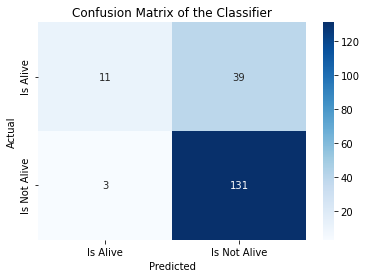

In [26]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['Is Alive', 'Is Not Alive'])

In [27]:
lr_default = LogisticRegression(solver = 'lbfgs',
                                C = 1.0,
                                warm_start = False,
                                random_state = 219)

In [28]:
# FITTING the training data
lr_default_fit = lr_default.fit(x_train, y_train)


# PREDICTING based on the testing set
lr_default_pred = lr_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', lr_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', lr_default_fit.score(x_test, y_test).round(4))


# SCORING with AUC
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_default_pred).round(4))


# saving scoring data for future use
logreg_train_score = lr_default_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = lr_default_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC score
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = lr_default_pred).round(4)

Training ACCURACY: 0.7518
Testing  ACCURACY: 0.7717
AUC Score        : 0.5988


In [29]:
########################################
# RandomizedSearchCV
########################################

# declaring a hyperparameter space
C_range          = np.arange(0.1, 50.0, 0.1)
warm_start_range = [True, False]
solver_range     = ['newton-cg', 'sag', 'lbfgs']


# creating a hyperparameter grid
param_grid = {'C'          : C_range,
              'warm_start' : warm_start_range,
              'solver'     : solver_range}


# INSTANTIATING the model object without hyperparameters
lr_tuned = LogisticRegression(random_state = 219,
                              max_iter     = 1000) # increased for convergence


# GridSearchCV object
lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
                                 param_distributions = param_grid, # parameters to tune
                                 cv                  = 3,          # how many folds in cross-validation
                                 n_iter              = 250,        # number of combinations of hyperparameters to try
                                 random_state        = 219,        # starting point for random sequence
                                 scoring = make_scorer(
                                           roc_auc_score,
                                           needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
lr_tuned_cv.fit(got_data, got_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

Tuned Parameters  : {'warm_start': False, 'solver': 'newton-cg', 'C': 20.200000000000003}
Tuned CV AUC      : 0.5392


In [30]:
# checking the best estimator for the model
lr_tuned_cv.best_estimator_

LogisticRegression(C=20.200000000000003, max_iter=1000, random_state=219,
                   solver='newton-cg')

In [31]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = LogisticRegression(C            = 20.200000000000003,
                              warm_start   = True,
                              solver       = 'newton-cg',
                              max_iter     = 1000,
                              random_state = 219)


# FITTING the model to the full dataset
lr_tuned.fit(got_data, got_target) # this is ok because already tuned


# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(x_test)


# SCORING the results
print('LR Tuned Training ACCURACY:', lr_tuned.score(x_train, y_train).round(4))
print('LR Tuned Testing  ACCURACY:', lr_tuned.score(x_test, y_test).round(4))
print('LR Tuned Testing  GAP     :',  abs(lr_tuned.score(x_train, y_train).round(4)-lr_tuned.score(x_test, y_test).round(4)).round(4))
print('LR Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test, y_test).round(4)   # accuracy
lr_tuned_test_gap   = abs(lr_tuned_train_score-lr_tuned_test_score).round(4) # testing gap


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc

LR Tuned Training ACCURACY: 0.75
LR Tuned Testing  ACCURACY: 0.7717
LR Tuned Testing  GAP     : 0.0217
LR Tuned AUC Score        : 0.6113


In [32]:
# unpacking the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")


True Negatives : 13
False Positives: 37
False Negatives: 5
True Positives : 129



# Classification Trees

In [33]:
# train/test split with the full model
got_data  =  got.loc[ : , candidate_dict['logit_full']]
got_target =  got.loc[ : , 'isAlive']


# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = got_target)

In [34]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [35]:
# INSTANTIATING a classification tree object
tree_pruned = DecisionTreeClassifier(max_depth        = 8,
                                     min_samples_leaf = 25,
                                     random_state     = 219)


# FITTING the training data
tree_pruned_fit = tree_pruned.fit(x_train, y_train)


# PREDICTING on new data
tree_pruned_pred = tree_pruned_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pruned_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = tree_pruned_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = tree_pruned_fit.score(x_test, y_test).round(4) # accuracy
pruned_tree_test_gap    = abs(pruned_tree_train_score-pruned_tree_test_score).round(4)


print('Testing GAP      :', pruned_tree_test_gap)



# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = tree_pruned_pred).round(4) # auc

Training ACCURACY: 0.7603
Testing  ACCURACY: 0.7337
AUC Score        : 0.5413
Testing GAP      : 0.0266


In [36]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_pruned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 6
False Positives: 44
False Negatives: 5
True Positives : 129



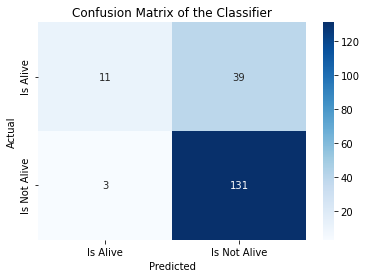

In [37]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['Is Alive', 'Is Not Alive'])

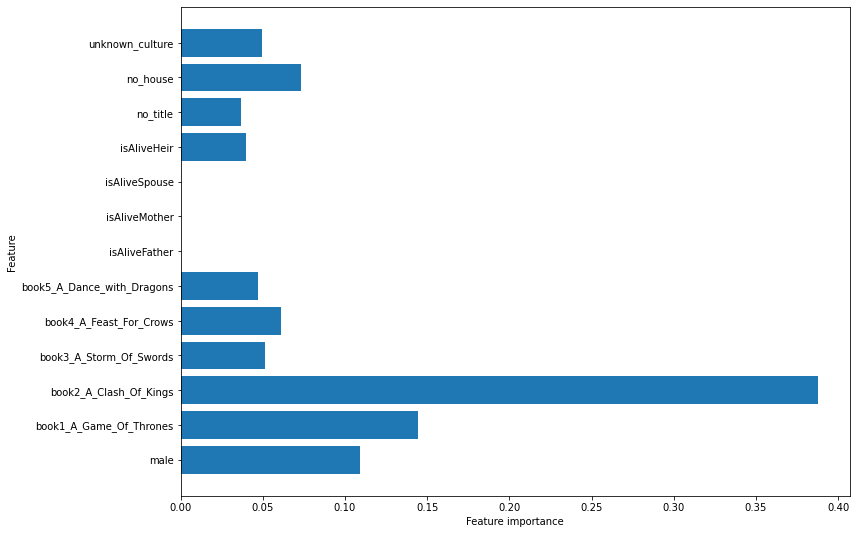

In [38]:
# plotting feature importance
plot_feature_importances(tree_pruned,
                         train = x_train,
                         export = False)

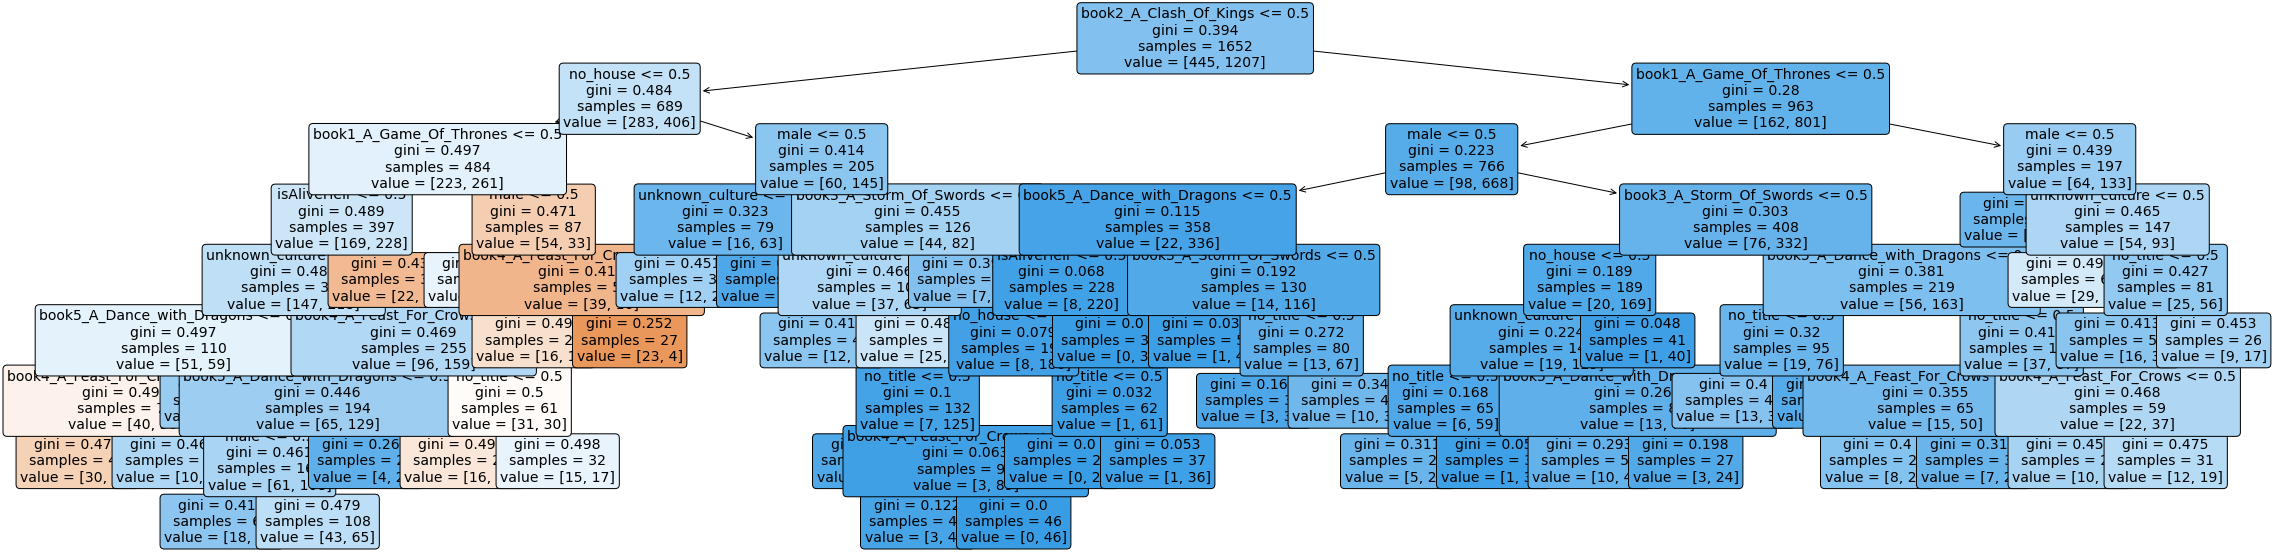

In [39]:
# setting figure size
plt.figure(figsize=(40, 10)) # adjusting to better fit the visual


# developing a plotted tree
plot_tree(decision_tree = tree_pruned, # changing to pruned_tree_fit
          feature_names = x_train.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

In [40]:
# declaring a hyperparameter space
criterion_range = ['gini', 'entropy']
splitter_range  = ['best', 'random']
depth_range     = np.arange(1, 8, 1)
leaf_range      = np.arange(1, 100, 1)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_range,
              'splitter'         : splitter_range,
              'max_depth'        : depth_range,
              'min_samples_leaf' : leaf_range}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 1000,
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(got_data, got_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

Tuned Parameters  : {'splitter': 'random', 'min_samples_leaf': 3, 'max_depth': 6, 'criterion': 'gini'}
Tuned Training AUC: 0.55


In [41]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = DecisionTreeClassifier(splitter         = 'random',
                                    min_samples_leaf = 3,
                                    max_depth        = 6, #Limiting the max_depth to 8
                                    criterion        = 'gini',
                                    random_state     = 219)


# FITTING to the FULL DATASET (due to cross-validation)
tree_tuned_fit = tree_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy
tree_tuned_test_gap  = abs(tree_tuned_train_score - tree_tuned_test_score).round(4)



# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                       y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY: 0.7694
Testing  ACCURACY: 0.8152
AUC Score        : 0.6725


In [42]:
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 18
False Positives: 32
False Negatives: 2
True Positives : 132



# KNN Modeling

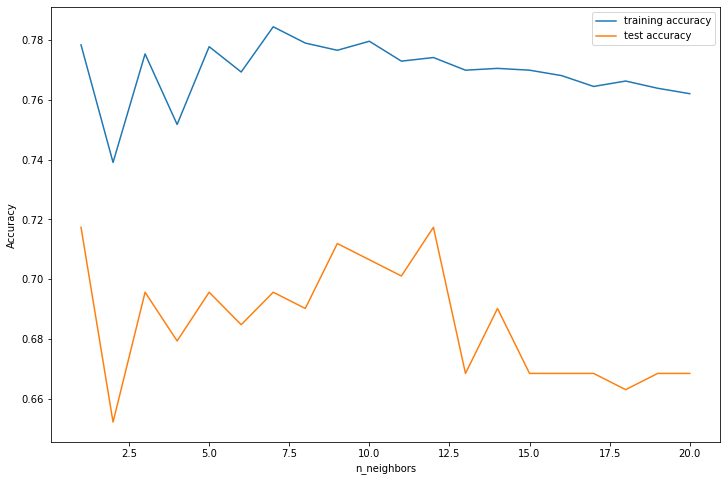

The optimal number of neighbors is: 1


In [43]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(x_data        = got_data,
                                  y_data        = got_target,
                                  response_type = 'class')

In [44]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(got_data)


# TRANSFORMING the data
x_scaled     = scaler.transform(got_data)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            got_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = got_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))


# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)
knn_test_gap  = knn_train_score - knn_test_score

# displaying training gap
print('Train-Test GAP   :', (knn_train_score - knn_test_score).round(4))

# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

Training ACCURACY: 0.7343
Testing  ACCURACY: 0.6467
AUC Score        : 0.5945
Train-Test GAP   : 0.0876


In [45]:
# unpacking the confusion matrix
knn_tree_tn, \
knn_tree_fp, \
knn_tree_fn, \
knn_tree_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {knn_tree_tn}
False Positives: {knn_tree_fp}
False Negatives: {knn_tree_fn}
True Positives : {knn_tree_tp}
""")


True Negatives : 24
False Positives: 26
False Negatives: 39
True Positives : 95



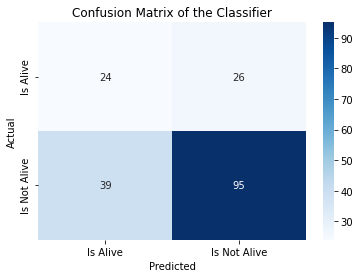

In [46]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = knn_pred,
          labels = ['Is Alive', 'Is Not Alive'])

# Random Forest

In [47]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = 8,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [48]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 0.8111
Testing  ACCURACY: 0.7609
AUC Score        : 0.5913


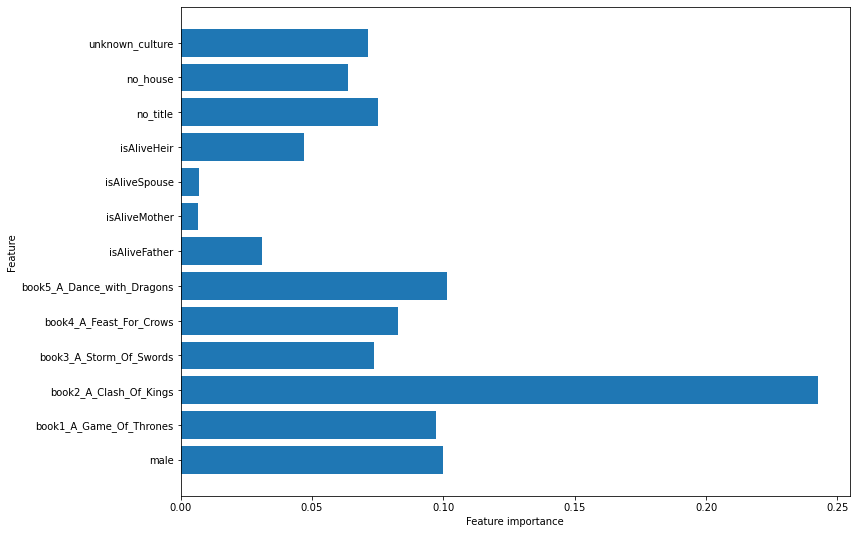

In [49]:
# plotting feature importances
plot_feature_importances(rf_default_fit,
                         train = x_train,
                         export = False)

In [50]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 11
False Positives: 39
False Negatives: 5
True Positives : 129



In [51]:
# declaring model performance objects
rf_train_acc = rf_default_fit.score(x_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(x_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)
rf_test_gap  = abs(rf_train_acc-rf_test_acc).round(4)

print(rf_train_acc)
print(rf_test_acc)
print(rf_test_gap)
print(rf_auc)

0.8111
0.7609
0.0502
0.5913


# Gradient Boosted Machines

In [52]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 200,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 8,
                                              warm_start    = True,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))


Training ACCURACY: 0.8184
Testing ACCURACY : 0.7772
AUC Score        : 0.6339


In [53]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 16
False Positives: 34
False Negatives: 7
True Positives : 127



In [54]:
# declaring model performance objects
gbm_train_acc = full_gbm_default_fit.score(x_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)
gbm_test_gap  = abs(gbm_train_acc-gbm_test_acc).round(4)

print(gbm_train_acc)
print(gbm_test_acc)
print(gbm_auc)
print(gbm_test_gap)

0.8184
0.7772
0.6339
0.0412


In [55]:
# declaring a hyperparameter space
learn_range        = np.arange(0.1, 0.2, 0.1)
estimator_range    = np.arange(100, 501, 25)
depth_range        = np.arange(2, 11, 2)
warm_start_range   = [True, False]

# creating a hyperparameter grid
param_grid = {'learning_rate' : learn_range,
              'max_depth'     : depth_range,
              'n_estimators'  : estimator_range,
              'warm_start'    : warm_start_range}


# INSTANTIATING the model object without hyperparameters
full_gbm_grid = GradientBoostingClassifier(random_state = 219)


# GridSearchCV object
full_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,
                           param_distributions = param_grid,
                           cv                  = 3,
                           n_iter              = 10,
                           random_state        = 219,
                           scoring             = make_scorer(roc_auc_score,
                                                 needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
full_gbm_cv.fit(got_data, got_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", full_gbm_cv.best_params_)
print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

#run during development of model

Tuned Parameters  : {'warm_start': True, 'n_estimators': 200, 'max_depth': 2, 'learning_rate': 0.1}
Tuned Training AUC: 0.546


In [56]:
# INSTANTIATING with best_estimator
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.1,
                                       max_depth     = 8,                                                                                
                                       criterion     = 'friedman_mse',
                                       n_estimators  = 150,
                                       warm_start    = True,
                                       random_state  = 219)


# FITTING to the FULL DATASET (due to cross-validation)
gbm_tuned_fit = gbm_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

gbm_tuned_training_score=gbm_tuned_fit.score(x_train, y_train).round(4)
gbm_tuned_test_score=gbm_tuned_fit.score(x_test, y_test).round(4)
gbm_tuned_test_gap=abs(gbm_tuned_test_score-gbm_tuned_training_score).round(4)
gbm_tuned_auc_score = roc_auc_score(y_true  = y_test, y_score = gbm_tuned_pred).round(4)
print('Testing  GAP     :', gbm_tuned_test_gap)


Training ACCURACY: 0.8178
Testing  ACCURACY: 0.8424
AUC Score        : 0.7288
Testing  GAP     : 0.0246


In [57]:
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 24
False Positives: 26
False Negatives: 3
True Positives : 131



# Model Performance

In [58]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Tuned Logistic      {lr_tuned_auc}         {lr_tuned_tn, lr_tuned_fp, lr_tuned_fn, lr_tuned_tp}
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
Tuned Tree   {tree_tuned_auc}         {tuned_tree_tn, tuned_tree_fp, tuned_tree_fn, tuned_tree_tp}
KNN Model   {knn_auc_score}         {knn_tree_tn, knn_tree_fp, knn_tree_fn, knn_tree_tp}
Random Forest   {rf_auc}         {rf_tn, rf_fp, rf_fn, rf_tp}
GBM Model   {gbm_auc}         {gbm_default_tn, gbm_default_fp, gbm_default_fn, gbm_default_tp}
Tuned GBM Model   {gbm_tuned_auc_score}         {gbm_tuned_tn, gbm_tuned_fp, gbm_tuned_fn, gbm_tuned_tp}

""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Tuned Logistic', 'Pruned Tree', 'Tuned Tree', 
                       'KNN Model', 'Random Forest','GBM Model', 'Tuned GBM Model'],
           
    'AUC Score' : [logreg_auc_score, lr_tuned_auc, pruned_tree_auc_score, tree_tuned_auc,
                  knn_auc_score, rf_auc, gbm_auc, gbm_tuned_auc_score],
    
    'Training Accuracy' : [logreg_train_score, lr_tuned_train_score, pruned_tree_train_score,
                          tree_tuned_train_score, knn_train_score, rf_train_acc, gbm_train_acc,
                          gbm_tuned_training_score],
           
    'Testing Accuracy'  : [logreg_test_score, lr_tuned_test_score, pruned_tree_test_score,
                          tree_tuned_test_score, knn_test_score, rf_test_acc, gbm_test_acc,
                          gbm_tuned_test_score],
    
    'Testing Gap'       : [logreg_test_gap, lr_tuned_test_gap, pruned_tree_test_gap,
                          tree_tuned_test_gap, knn_test_gap, rf_test_gap, gbm_test_gap,
                          gbm_tuned_test_gap],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (lr_tuned_tn, lr_tuned_fp, lr_tuned_fn, lr_tuned_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp),
                          (tuned_tree_tn, tuned_tree_fp, tuned_tree_fn, tuned_tree_tp),
                          (knn_tree_tn, knn_tree_fp, knn_tree_fn, knn_tree_tp),
                          (rf_tn, rf_fp, rf_fn, rf_tp),
                          (gbm_default_tn, gbm_default_fp, gbm_default_fn, gbm_default_tp),
                          (gbm_tuned_tn, gbm_tuned_fp, gbm_tuned_fn, gbm_tuned_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)
print(model_performance)

#Best current model
print(f'''\nThe best model for this dataset is the''') 
if max(logreg_auc_score, lr_tuned_auc, pruned_tree_auc_score, tree_tuned_auc,
       knn_auc_score, rf_auc, gbm_auc, gbm_tuned_auc_score) == logreg_auc_score:
    print(f'''Logistic Model with a AUC score of {logreg_auc_score} and a test score of {logreg_test_score}''')
elif  max(lr_tuned_auc, pruned_tree_auc_score, tree_tuned_auc,
       knn_auc_score, rf_auc, gbm_auc, gbm_tuned_auc_score) == lr_tuned_auc:
    print(f'''Tuned Logistic Model with a AUC score of {lr_tuned_auc} and a test score of {lr_tuned_test_score}''')
elif  max(pruned_tree_auc_score, tree_tuned_auc,
       knn_auc_score, rf_auc, gbm_auc, gbm_tuned_auc_score) == pruned_tree_auc_score:
    print(f'''Pruned Tree with a AUC score of {pruned_tree_auc_score} and a test score of {logreg_test_score}''')
elif  max(tree_tuned_auc,
       knn_auc_score, rf_auc, gbm_auc, gbm_tuned_auc_score) == tree_tuned_auc:
    print(f'''Tuned Tree with a AUC score of {tree_tuned_auc} and a test score of {tree_tuned_test_score}''')
elif  max(knn_auc_score, rf_auc, gbm_auc, gbm_tuned_auc_score) == knn_auc_score:
    print(f'''KNN Model with a AUC score of {knn_auc_score} and a test score of {knn_test_score}''')
elif  max(rf_auc, gbm_auc, gbm_tuned_auc_score) == rf_auc:
    print(f'''Random Forest with a AUC score of {rf_auc} and a test score of {rf_test_acc}''')
elif  max(rf_auc, gbm_auc, gbm_tuned_auc_score) == gbm_auc:
    print(f'''GBM Model with a AUC score of {gbm_auc} and a test score of {gbm_test_acc}''')
elif  max(rf_auc, gbm_auc, gbm_tuned_auc_score) == gbm_tuned_auc_score:
    print(f'''GBM Model with a AUC score of {gbm_tuned_auc_score} and a test score of {gbm_tuned_test_score}''')
else: print ('The models used to analyze are not ideal.')



Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.5988         (11, 39, 3, 131)
Tuned Logistic      0.6113         (13, 37, 5, 129)
Pruned Tree   0.5413         (6, 44, 5, 129)
Tuned Tree   0.6725         (18, 32, 2, 132)
KNN Model   0.5945         (24, 26, 39, 95)
Random Forest   0.5913         (11, 39, 5, 129)
GBM Model   0.6339         (16, 34, 7, 127)
Tuned GBM Model   0.7288         (24, 26, 3, 131)


        Model Name  AUC Score  Training Accuracy  Testing Accuracy  Testing Gap  Confusion Matrix
0         Logistic     0.5988             0.7518            0.7717       0.0199  (11, 39, 3, 131)
1   Tuned Logistic     0.6113             0.7500            0.7717       0.0217  (13, 37, 5, 129)
2      Pruned Tree     0.5413             0.7603            0.7337       0.0266   (6, 44, 5, 129)
3       Tuned Tree     0.6725             0.7694            0.8152       0.0458  (18, 32, 2, 132)
4        KNN Model     0.5945             0.7